In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from pycaret.regression import *

In [2]:
data = pd.read_csv('kc_house_data.csv')

In [3]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
columns = ['id', 'date', 'zipcode', 'lat', 'long']
data_clean = data.drop(columns=columns, axis=1)

In [5]:
data_clean.dtypes

price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [6]:
data_clean.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15',
       'sqft_lot15'],
      dtype='object')

In [7]:
setup = setup(data_clean, target='price', train_size=0.6, n_jobs=-1,
              normalize=True, remove_multicollinearity=True,
              verbose=True, session_id=42, 
              numeric_features=['bedrooms', 'waterfront', 'view', 'condition', 'grade'])

# remove_outliers=True,
# outliers_threshold=0.05,

,Description,Value
0,session_id,42
1,Target,price
2,Original Data,"(21613, 16)"
3,Missing Values,False
4,Numeric Features,15
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(12318, 15)"


In [8]:
# exclude = ['par', 'ada', 'knn', 'huber', 'omp', 'en', 'svm', 'mlp', 'lasso', 'ridge', 'llar', 'br', 'ard', 'ransac', 'tr', 'xgboost']
# compare_models(fold=5, exclude=exclude)

In [13]:
model = create_model('lightgbm', fold=5)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,103841.8118,20513669899.3285,143225.9400,0.6970,0.2820,0.2406
1,107592.0244,23140580329.3173,152120.2824,0.6926,0.2809,0.2373
2,105960.2199,22409543854.4909,149698.1759,0.6838,0.2811,0.2387
3,104467.8301,20937335169.9560,144697.3917,0.7021,0.2803,0.2373
4,106846.2271,23658610696.1149,153813.5582,0.6921,0.2826,0.2351
Mean,105741.6227,22131947989.8415,148711.0697,0.6935,0.2814,0.2378
SD,1408.8116,1222376492.4688,4118.9503,0.0060,0.0008,0.0018


In [10]:
#          Com normalizacao
# 0.7634	R2 catboots sem normalizar

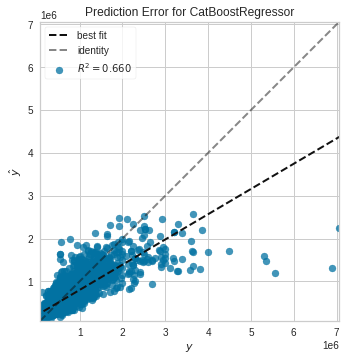

In [11]:
plot_model(model, plot='error')

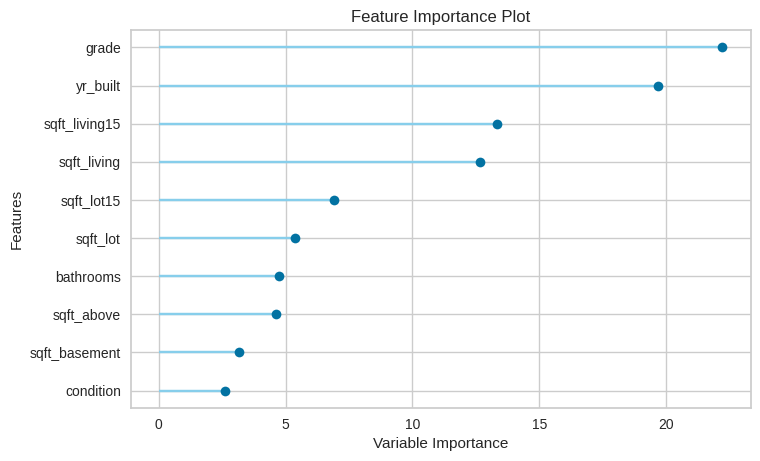

In [12]:
plot_model(model, plot='feature')